# Assignment 7

## Objective: To develop machine learning models that can effectively classify obfuscated malware concealed within memory to evade traditional detection methods.

In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Dataset Exploration and Preprocessing



## Step 1: Load the dataset

Loading the dataset into a dataframe called mal_mem_df. We will also explore the dataset to understand its structure and features

In [62]:
# Load the dataset
mal_mem_df = pd.read_csv('data.csv')
mal_mem_df.shape

(58596, 57)

## Insight:

The dataset has 58,596 rows and 57 columns.

In [63]:
mal_mem_df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [64]:
mal_mem_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58596 entries, 0 to 58595
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                58596 non-null  object 
 1   pslist.nproc                            58596 non-null  int64  
 2   pslist.nppid                            58596 non-null  int64  
 3   pslist.avg_threads                      58596 non-null  float64
 4   pslist.nprocs64bit                      58596 non-null  int64  
 5   pslist.avg_handlers                     58596 non-null  float64
 6   dlllist.ndlls                           58596 non-null  int64  
 7   dlllist.avg_dlls_per_proc               58596 non-null  float64
 8   handles.nhandles                        58596 non-null  int64  
 9   handles.avg_handles_per_proc            58596 non-null  float64
 10  handles.nport                           58596 non-null  in

In [7]:
# Using describe() to understand the dataset
mal_mem_df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,58596.0,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000
mean,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,0.0,...,391.347549,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881
std,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,0.0,...,4.529704,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [8]:
mal_mem_df['Class'].value_counts()

Class
Benign     29298
Malware    29298
Name: count, dtype: int64

## Insight

The dataset is divided equally into benign and malware classes. It is a balanced dataset, hence we dont need to balance the dataset.

In [65]:
# Fill the missing values
mal_mem_df.fillna(method="ffill", inplace=True)

In [66]:
# Converting data types
mal_mem_df["Class"] = mal_mem_df["Class"].astype("category")

## Step 2: Classification Problems

In the following three tasks, we will be classifying between the following criteria:

1. Classify Benign vs Malware
2. Classify Malware Category (Ransomware, spyware, Trojan, and Benign)
3. Classify Malware Variants

### Task 1: Classify Benign vs Malware

Implement a decision tree classifier to conduct a binary classification between benign vs malware instances.

**Step 1: Seperate the features and target, split the dataset and run the classifier.**

In [67]:
# Separate features and target
y = mal_mem_df["Class"]
X = mal_mem_df.drop(columns=["Category", "Class"])

In [68]:
# Split the dataset into training and testing sets, using the usual 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [10]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, min_samples_leaf=2, min_samples_split=5)
dt_model.fit(X_train, y_train)
if 1:
  print("Decision Tree Classifier ran successfully")

Decision Tree Classifier ran successfully


**Step 2: Analyze the importance of features in classifying the obfuscated malware.**


In [14]:
# Use the classifier to collect the feature importances
feature_importances_dt = dt_model.feature_importances_
selected_feature_indices_dt = np.argsort(feature_importances_dt)[::-1][:5]
selected_features_dt = X.columns[selected_feature_indices_dt]

**Step 3: Plot the top 5 features.**

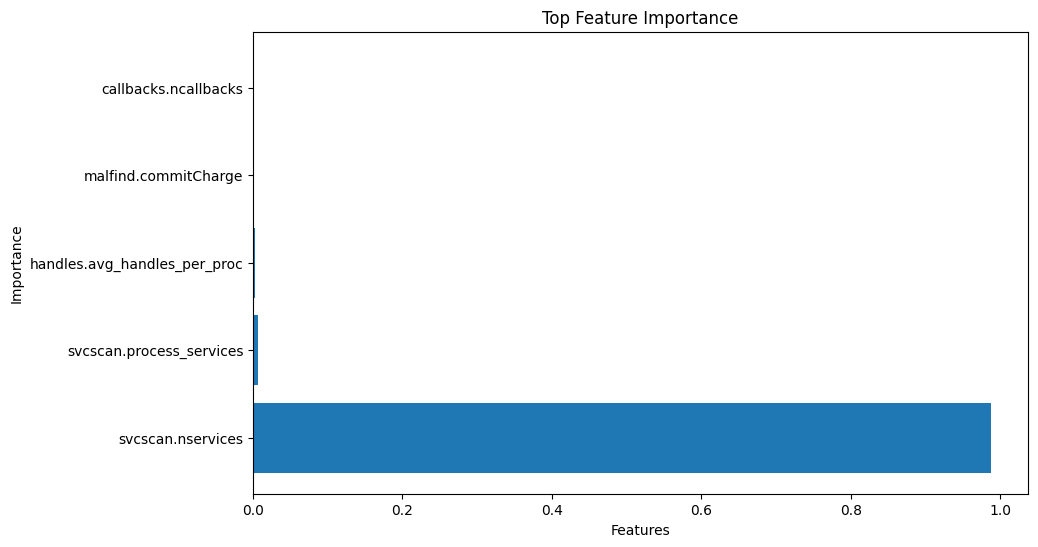

In [15]:
# Plotting the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(selected_features_dt, feature_importances_dt[selected_feature_indices_dt[:5]])
plt.title('Top Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**Step 3: Evaluating the metrics of the Decision Tree Classifier. We use metrics of accuracy, precision, recall and f1 score.**


In [70]:
y_pred_dt = dt_model.predict(X_test)

In [71]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, pos_label='Malware')
recall = recall_score(y_test, y_pred_dt, pos_label='Malware')
f1 = f1_score(y_test, y_pred_dt, pos_label='Malware')

In [72]:
# Create a dataframe and create columns
metrics_cols_dt = ["Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]
metrics_dt = pd.DataFrame(columns=metrics_cols_dt)

In [14]:
# Append all metrics in the dataframee
metrics_dt = metrics_dt.append({
        "Accuracy Score": accuracy,
        "F1 Score": f1,
        "Precision Score": precision,
        "Recall Score": recall
    }, ignore_index=True)

NameError: name 'metrics_dt' is not defined

In [20]:
metrics_dt

,Accuracy Score,F1 Score,Precision Score,Recall Score


In [21]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00      5873
     Malware       1.00      1.00      1.00      5847

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



## Insights:

As one can see, the five most important features are svcscan.nservices, svcscan.process_services, handles.avg_handles_per_proc, malfind.commitCharge, and callbacks.ncallbacks.

The following are the definitions of these features taken from the following paper: [Enhanced detection of obfuscated malware in memory dumps: a machine learning approach for advanced cybersecurity](https://https://www.researchgate.net/publication/377708272_Enhanced_detection_of_obfuscated_malware_in_memory_dumps_a_machine_learning_approach_for_advanced_cybersecurity)

1. svcscan.nservices: This represents the total number of services running, a figure that obfuscated malware might influenceby adding its own services or hijacking existing ones

2. svcscan.process_services: The count of services running in separate processes is tracked, a feature obfuscated malware might exploitto run its malicious services independently

3. handles.avg_handles_per_proc: This represents the average number of handles per process, a figure that might be inflated by obfuscatedmalware as it opens numerous handles for malicious activities

4. malfind.commitCharge: This quantifies the commit charge of detected memory injections, a crucial feature to analyze as obfuscatedmalware often manipulates memory for code execution and stealth.

5. callbacks.ncallbacks: This quantifies the number of registered callback functions within the system, where an unusually highcount might be indicative of obfuscated malware attempting to intercept or monitor system activities.

As seen in the metrics report, the Accuracy Score, F1 Score, the Precision Score and the Recall Score are all at 99.9829%, showing the efficacy of the model.

## **NOTE: In order to classify malware category and variants, we will require to split the category names, the first part of the name being the category name, and the second part being category variant**

In [22]:
mal_mem_df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [73]:
# Split the category to capture the first word, which signifies the category type
def category(column):
    return column.split("-")[0] if "-" in column else column

In [74]:
# Split the category to capture the second word, which signifies the category name
def category_name(column):
    return column.split("-")[1] if "-" in column else column

In [75]:
# Create new column category to store mawlare type
mal_mem_df["category"] = mal_mem_df["Category"].apply(category)

In [76]:
mal_mem_df["category"].value_counts()

category
Benign        29298
Spyware       10020
Ransomware     9791
Trojan         9487
Name: count, dtype: int64

## Insight

There are four malware categories in our dataset:

1. Benign
2. Ransomware
3. Spyware
4. Trojan

The numbers in the pie chart reinforce the fact that the dataset is balanced betwene the benign and the malware class.

<Axes: ylabel='count'>

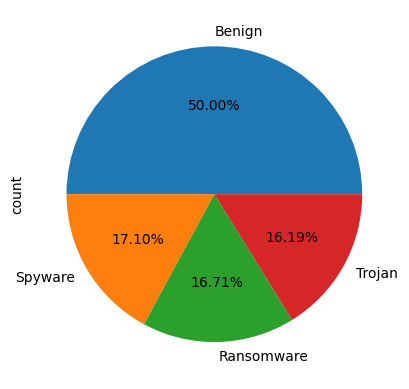

In [77]:
# Plotting the pie chart for the category names
mal_mem_df["category"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [78]:
# Creating a column with the names of the variants
mal_mem_df["category_name"] = mal_mem_df["Category"].apply(category_name)
mal_mem_df["category_name"].value_counts()

category_name
Benign          29298
Transponder      2410
Gator            2200
Shade            2128
Ako              2000
180solutions     2000
CWS              2000
Refroso          2000
Scar             2000
Conti            1988
Emotet           1967
Maze             1958
Zeus             1950
Pysa             1717
Reconyc          1570
TIBS             1410
Name: count, dtype: int64

## Insight

There are sixteen malware variants in our dataset:

1. Benign         
2. Transponder     
3. Gator           
4. Shade            
5. Ako             
6. 180solutions    
7. CWS             
8. Refroso          
9. Scar            
10. Conti         
11. Emotet          
12. Maze            
13. Zeus             
14. Pysa             
15. Reconyc          
16. TIBS             

<Axes: ylabel='count'>

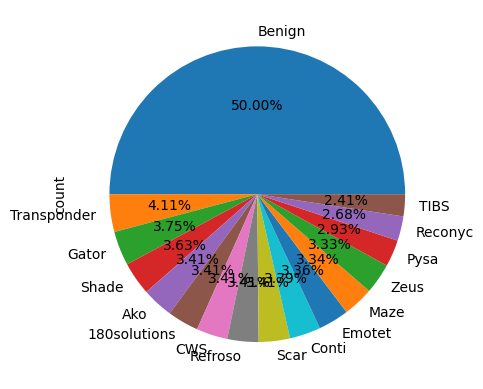

In [79]:
mal_mem_df["category_name"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [25]:
mal_mem_df.tail()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class,category,category_name
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,24,116,0,120,86,0,8,Malware,1,Shade
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,24,116,0,116,88,0,8,Malware,1,Shade
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,24,116,0,120,88,0,8,Malware,1,Shade
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,24,116,0,120,87,0,8,Malware,1,Shade
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,24,116,0,120,86,0,8,Malware,1,Shade


In [80]:
# Define the label encoder
def label_encoder(column):
    lencode = LabelEncoder().fit(column)
    print(column.name, lencode.classes_)
    return lencode.transform(column)

In [81]:
# Encoding the columns
mal_mem_df["category"] = label_encoder(mal_mem_df["category"])
mal_mem_df["category_name"] = label_encoder(mal_mem_df["category_name"])
mal_mem_df["class"] = label_encoder(mal_mem_df["Class"])

category ['Benign' 'Ransomware' 'Spyware' 'Trojan']
category_name ['180solutions' 'Ako' 'Benign' 'CWS' 'Conti' 'Emotet' 'Gator' 'Maze'
 'Pysa' 'Reconyc' 'Refroso' 'Scar' 'Shade' 'TIBS' 'Transponder' 'Zeus']
Class ['Benign' 'Malware']


In [82]:
# Drop the Category and Class columns
mal_mem_df.drop(["Category", "Class"], axis=1, inplace=True)

In [20]:
mal_mem_df.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,category,category_name,class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,24,116,0,121,87,0,8,0,2,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,24,118,0,122,87,0,8,0,2,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,27,118,0,120,88,0,8,0,2,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,27,118,0,120,88,0,8,0,2,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,24,118,0,124,87,0,8,0,2,0


### Subtask 2: Classify Malware Category

Implement classifiers to classify malware categories (Spyware, Ransomware, Trojan, Benign). For this exercise, we will be using five classifiers:

1. AdaBoost
2. Logistic Regression
3. Simple Vector Machine (SVM)
4. Decision Tree
5. Random Forest

**Step 1: Seperate the features and target, split the dataset and run the classifiers.**

In [83]:
# Separate features and target
X = mal_mem_df.drop("category", axis=1)
y = mal_mem_df["category"]

In [84]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(n_neighbors=3)


In [25]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN only to the training data
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
clf3.fit(X_train_resampled, y_train_resampled)
# The rest of the pipeline can proceed as usual with the resampled training data


KNeighborsClassifier(n_neighbors=3)

K-Nearest Neighbors Classifier Accuracy: 0.9475
K-Nearest Neighbors Classifier Precision: 0.9475
K-Nearest Neighbors Classifier Recall: 0.9475
K-Nearest Neighbors Classifier F1-Score: 0.9475


<Axes: >

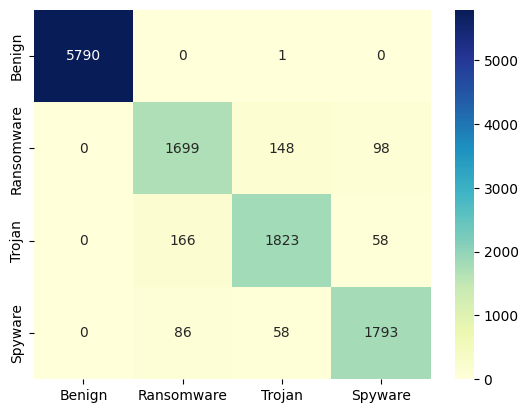

In [56]:
y_pred = clf3.predict(X_test)
# Calculate KNN classifier metrics
knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred, average='weighted')
knn_recall = recall_score(y_test, y_pred, average='weighted')
knn_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"K-Nearest Neighbors Classifier Accuracy: {knn_accuracy:.4f}")
print(f"K-Nearest Neighbors Classifier Precision: {knn_precision:.4f}")
print(f"K-Nearest Neighbors Classifier Recall: {knn_recall:.4f}")
print(f"K-Nearest Neighbors Classifier F1-Score: {knn_f1:.4f}")
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], annot=True)

Random Forest Classifier Accuracy: 0.9772
Random Forest Classifier Precision: 0.9773
Random Forest Classifier Recall: 0.9772
Random Forest Classifier F1-Score: 0.9772


<Axes: >

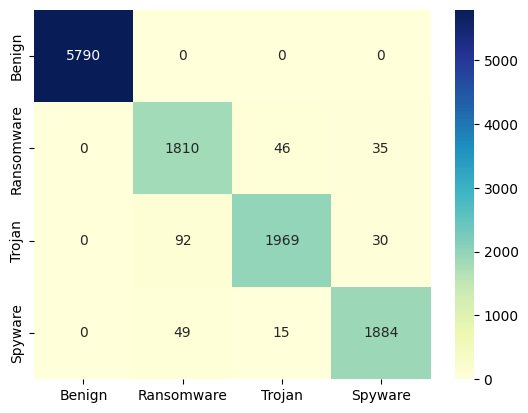

In [57]:
clf1 = RandomForestClassifier(n_estimators=700, random_state=42)

clf1.fit(X_train_resampled, y_train_resampled)

y_pred = clf1.predict(X_test)
# Calculate Random Forest classifier metrics
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred,average='weighted')
rf_recall = recall_score(y_test, y_pred,average='weighted')
rf_f1 = f1_score(y_test, y_pred,average='weighted')

print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Classifier Precision: {rf_precision:.4f}")
print(f"Random Forest Classifier Recall: {rf_recall:.4f}")
print(f"Random Forest Classifier F1-Score: {rf_f1:.4f}")
conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf , cmap='YlGnBu', fmt='', xticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], yticklabels=['Benign','Ransomware' ,'Trojan' ,'Spyware'], annot=True)

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the XGBoost Classifier
clf4 = XGBClassifier(n_estimators=700, random_state=42)

# Train the model on the training data
clf4.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf4.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      1951
           2       1.00      1.00      1.00      2030
           3       1.00      1.00      1.00      1949

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



In [164]:
# Initialize all the classifiers

adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), n_estimators=50)
logreg = LogisticRegression(penalty = "l2", C = 10, max_iter=10000) # L2 penalty, 10000 max iterations
svc = SVC(kernel="linear", random_state=42) # Kernel is linear
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [165]:
# Create a list of tuples called classifiers which stores thee classifiers

classifiers = [
    ("Adaboost", adaboost),
     ("Logistic Regression", logreg),
    ("Support Vector", svc),
    ("Decision Tree", dt),
    ("Random Forest", rf)
]

In [166]:
# Create a dataframe with model name and four columns which correspond to the metrics
metrics_sbtsk2_cols = ["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]
metrics_sbtsk2 = pd.DataFrame(columns=metrics_sbtsk2_cols)

**Step 2: Evaluate the performance of classifiers and compare results. We evaluated the performance of each classification problem using evaluation metrics of accuracy, precision, recall and F1-score.**

In [167]:
# Loop through all classifiers
for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_predict = classifier.predict(X_test)

    print("\nClassifier", classifier_name, "successful. Classification Report given:")
    print(classification_report(y_test, y_predict))

    # Store metrics in the dataframe
    metrics_sbtsk2 = metrics_sbtsk2.append({
        "Model Name": classifier_name,
        "Accuracy Score": accuracy_score(y_test, y_predict),
        "F1 Score": f1_score(y_test, y_predict, average='weighted'),
        "Precision Score": precision_score(y_test, y_predict, average='weighted'),
        "Recall Score": recall_score(y_test, y_predict, average='weighted')
    }, ignore_index=True)


Classifier Adaboost successful. Classification Report given:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      1951
           2       1.00      1.00      1.00      2030
           3       1.00      1.00      1.00      1949

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



<ipython-input-167-2cc8378d032c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk2 = metrics_sbtsk2.append({



Classifier Logistic Regression successful. Classification Report given:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       0.50      0.52      0.51      1951
           2       0.57      0.42      0.48      2030
           3       0.59      0.73      0.65      1949

    accuracy                           0.77     11720
   macro avg       0.67      0.67      0.66     11720
weighted avg       0.77      0.77      0.77     11720



<ipython-input-167-2cc8378d032c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk2 = metrics_sbtsk2.append({



Classifier Support Vector successful. Classification Report given:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       0.50      0.55      0.52      1951
           2       0.62      0.41      0.49      2030
           3       0.61      0.76      0.67      1949

    accuracy                           0.78     11720
   macro avg       0.68      0.68      0.67     11720
weighted avg       0.79      0.78      0.78     11720



<ipython-input-167-2cc8378d032c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk2 = metrics_sbtsk2.append({



Classifier Decision Tree successful. Classification Report given:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       1.00      1.00      1.00      1951
           2       1.00      1.00      1.00      2030
           3       1.00      1.00      1.00      1949

    accuracy                           1.00     11720
   macro avg       1.00      1.00      1.00     11720
weighted avg       1.00      1.00      1.00     11720



<ipython-input-167-2cc8378d032c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk2 = metrics_sbtsk2.append({



Classifier Random Forest successful. Classification Report given:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5790
           1       0.93      0.94      0.93      1951
           2       0.94      0.95      0.94      2030
           3       0.98      0.96      0.97      1949

    accuracy                           0.97     11720
   macro avg       0.96      0.96      0.96     11720
weighted avg       0.97      0.97      0.97     11720



<ipython-input-167-2cc8378d032c>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk2 = metrics_sbtsk2.append({


In [168]:
metrics_sbtsk2

,Model Name,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Adaboost,1.000000,1.000000,1.000000,1.000000
1,Logistic Regression,0.774573,0.771285,0.774313,0.774573
2,Support Vector,0.782935,0.778965,0.785128,0.782935
3,Decision Tree,1.000000,1.000000,1.000000,1.000000
4,Random Forest,0.973635,0.973691,0.973822,0.973635


## Insights

1. Adaboost and Decision Tree have a 100% across the board for all the metrics. Random Forest is the second best model.
2. Logistic Regression has the least metric score, even with an L2 penalty, regularization strength of 10, and a max_iteration of 10000.
3. SVM fares a little better than Logistic Regression, but not quiet as good as the other three.

Upon comparison, the best model to classify category type are in the order:

1. 1st position (tie) Adaboost and Decision Tree
2. 2nd position Random Forest
3. 3rd position SVM
4. 4th position Logistic Regression

Therefore, the best model(s) to classify category type will be **Adaboost** and **Decision Tree**.

Given below is a line chart showing the four metrics for the five models.

In [169]:
models = metrics_sbtsk2["Model Name"].values
accuracy = metrics_sbtsk2["Accuracy Score"].values
f1 = metrics_sbtsk2["F1 Score"].values
precision = metrics_sbtsk2["Precision Score"].values
recall = metrics_sbtsk2["Recall Score"].values

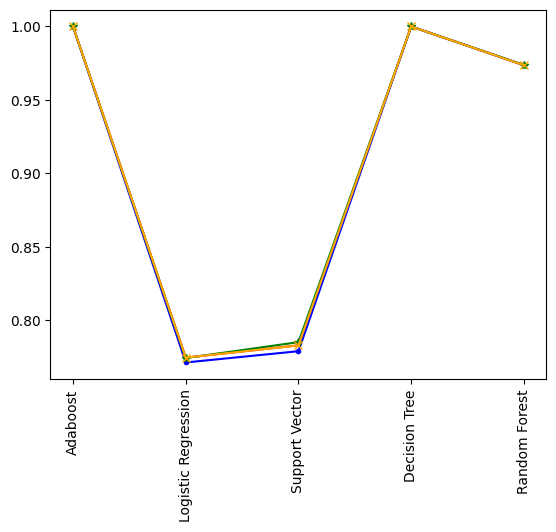

In [170]:
# Plot the metrics in a line chart
plt.figure()
plt.plot(models, accuracy, color="red", marker=",")
plt.plot(models, f1, color="blue", marker=".")
plt.plot(models, precision, color="green", marker="*")
plt.plot(models, recall, color="orange", marker="x")
plt.xticks(rotation=90)
plt.show()

### Subtask 3: Classify Malware Variant

Implement classifiers to identify specific malware variants (e.g., Emotet, Transponder, Reconyc, Zeus).

For this exercise, we will also be using five classifiers:

1. AdaBoost
2. Logistic Regression
3. Simple Vector Machine (SVM)
4. Decision Tree
5. Random Forest

**Step 1: Seperate the features and target, split the dataset and run the classifiers.**

In [ ]:

mal_mem_df.head()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,category,category_name,class
0,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,0,...,24,116,0,121,87,0,8,0,2,0
1,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,0,...,24,118,0,122,87,0,8,0,2,0
2,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,0,...,27,118,0,120,88,0,8,0,2,0
3,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,0,...,27,118,0,120,88,0,8,0,2,0
4,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,0,...,24,118,0,124,87,0,8,0,2,0


In [26]:
# Separate features and target
X = mal_mem_df.drop("category_name", axis=1)
y = mal_mem_df["category_name"]

In [27]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

clf3 = KNeighborsClassifier(n_neighbors=3)


In [39]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN only to the training data
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
clf3.fit(X_train_resampled, y_train_resampled)
# The rest of the pipeline can proceed as usual with the resampled training data


KNeighborsClassifier(n_neighbors=3)

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Initialize the XGBoost Classifier
model = xgb.XGBClassifier(n_estimators=700, learning_rate = 0.3, max_depth = 6,random_state=42)

# Train the model on the training data
clf4 = model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf4.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
#print("Classification Report:")
#print(classification_report(y_test, y_pred))


Accuracy: 0.83


In [53]:
from sklearn.ensemble import HistGradientBoostingClassifier

clf8 = HistGradientBoostingClassifier().fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf8.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {
        key: value for key,
        value in _name_estimators(classifiers)
        }
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError(f"vote must be 'probability' "f"or 'classlabel'"f"; got (vote={self.vote})")
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError(f'Number of classifiers and'f' weights must be equal'f'; got {len(self.weights)} weights,'f' {len(self.classifiers)} classifiers')
    # Use LabelEncoder to ensure class labels start
    # with 0, which is important for np.argmax
    # call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: # 'classlabel' vote
    # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X) for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x, weights=self.weights)),axis=1, arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0,weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        if not deep:
            return super().get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out[f'{name}__{key}'] = value
            return out


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np
clf1 = LogisticRegression(penalty='l2',C=0.001,solver='lbfgs',random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1,criterion='entropy',random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
pipe1 = Pipeline([['sc', StandardScaler()],['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],['clf', clf3]])
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc_ovr')
    print(f'ROC AUC: {scores.mean():.2f} 'f'(+/- {scores.std():.2f}) [{label}]')

10-fold cross validation:

ROC AUC: 0.93 (+/- 0.00) [Logistic regression]
ROC AUC: 0.77 (+/- 0.00) [Decision tree]
ROC AUC: 0.77 (+/- 0.01) [KNN]


In [35]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10,scoring='roc_auc_ovr')
    print(f'ROC AUC: {scores.mean():.2f} 'f'(+/- {scores.std():.2f}) [{label}]')

ROC AUC: 0.93 (+/- 0.00) [Logistic regression]
ROC AUC: 0.77 (+/- 0.00) [Decision tree]
ROC AUC: 0.77 (+/- 0.01) [KNN]


c:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    raise ValueError(
ValueError: MajorityVoteClassifier should either be a classifier to be used with response_method=predict_proba or the response_method should be 'predict'. 

ROC AUC: nan (+/- nan) [Majority voting]


c:\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python\Python311\Lib\site-packages\sklearn\utils\_response.py", line 235, in _get_response_values
    raise ValueError(
ValueError: MajorityVoteClassifier should either be a classifier to be used with response_method=predict_proba or the response_method should be 'predict'. 

In [49]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(penalty='l2',C=0.001,solver='lbfgs',random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X_train, y_train, 
                                              cv=5, 
                                              scoring='roc_auc_ovr')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.93 (+/- 0.00) [Logistic Regression]
Accuracy: 0.98 (+/- 0.00) [Random Forest]
Accuracy: 0.95 (+/- 0.00) [Naive Bayes]


In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Define your classifiers
log_reg = LogisticRegression(penalty='l2',C=0.001,solver='lbfgs',random_state=1)
forest = RandomForestClassifier(random_state=1)
bayes = GaussianNB()
ensemble = VotingClassifier(estimators=[
    ('lr', log_reg),
    ('rf', forest),
    ('gnb', bayes)
], voting='soft')

# List of classifiers and their labels
classifiers = [log_reg, forest, bayes, ensemble]
labels = ['Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Ensemble']

# Perform cross-validation and print accuracy
for clf, label in zip(classifiers, labels):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc_ovr')
    print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std():.2f}) [{label}]")

Accuracy: 0.91 (+/- 0.00) [Logistic Regression]
Accuracy: 1.00 (+/- 0.00) [Random Forest]
Accuracy: 0.89 (+/- 0.00) [Gaussian Naive Bayes]
Accuracy: 0.98 (+/- 0.00) [Ensemble]


In [87]:
import pandas as pd
x_train_df = pd.DataFrame(X_train)
print(x_train_df.head())

         0         1         2    3         4         5         6         7   \
0 -0.241427  0.484116 -1.128092  0.0 -0.398588 -0.900011 -1.020173 -0.440037   
1  0.450950  0.860519 -1.302673  0.0 -0.441602 -0.445162 -1.025714 -0.316754   
2 -1.799275 -1.397900  1.104366  0.0  0.440514 -0.699877  1.060931 -0.172306   
3 -0.587615  0.107713 -0.728770  0.0 -0.288991 -0.951560 -0.751147 -0.427709   
4  0.450950  0.484116 -0.386838  0.0 -0.336354 -0.287481 -0.819893 -0.210113   

         8    9   ...        47        48        49   50        51        52  \
0 -0.319427  0.0  ...  0.021983 -0.695219 -0.567286  0.0 -1.061184  0.030102   
1 -0.352382  0.0  ...  0.021983 -0.695219 -0.567286  0.0  0.001578 -0.288970   
2  0.389819  0.0  ...  0.021983  1.266059  0.722713  0.0  0.355832  0.349173   
3 -0.235459  0.0  ...  0.021983 -0.695219 -0.567286  0.0 -0.706930 -0.288970   
4 -0.238155  0.0  ...  0.021983 -0.695219 -0.567286  0.0  0.355832 -0.288970   

         53        54        55   56  

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Gradient Boosting Classifier
clf_gb = GradientBoostingClassifier(n_estimators=700, random_state=42)

# Train the model on the training data
clf_gb.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = clf_gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'X_train_resampled' is not defined

In [70]:
from sklearn.ensemble import AdaBoostClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=1)
ada = AdaBoostClassifier(estimator=tree,n_estimators=500,learning_rate=0.1,random_state=1)
tree = tree.fit(X_train_resampled, y_train_resampled)
y_train_pred = tree.predict(X_train_resampled)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train_resampled, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print(f'Decision tree train/test accuracies 'f'{tree_train:.3f}/{tree_test:.3f}')


Decision tree train/test accuracies 0.126/0.067


In [71]:
ada = ada.fit(X_train_resampled, y_train_resampled)
y_train_pred = ada.predict(X_train_resampled)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train_resampled, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print(f'AdaBoost train/test accuracies '
f'{ada_train:.3f}/{ada_test:.3f}')


KeyboardInterrupt: 

In [175]:
# Initialize all the classifiers

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20), n_estimators=50)
logreg = LogisticRegression(penalty = "l2", C = 10, max_iter=10000)
svc = SVC(kernel="linear", random_state=42)
dt = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, min_samples_split=5)
rf = RandomForestClassifier()

In [177]:
# Create a list of tuples called classifiers which stores thee classifiers

classifiers = [
    ("Adaboost", adaboost),
     ("Logistic Regression", logreg),
    ("Support Vector", svc),
    ("Decision Tree", dt),
    ("Random Forest", rf)
]

In [178]:
metrics_sbtsk3_cols = ["Model Name", "Accuracy Score", "F1 Score", "Precision Score", "Recall Score"]
metrics_sbtsk3 = pd.DataFrame(columns=metrics_sbtsk3_cols)

**Step 2: Evaluate the performance of classifiers and compare results. We evaluated the performance of each classification problem using evaluation metrics of accuracy, precision, recall and F1-score.**

In [180]:
# Loop through all classifiers
for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("\nClassifier", classifier_name, "successful.")

     # Store metrics in the dataframe
    metrics_sbtsk3 = metrics_sbtsk3.append({
        "Model Name": classifier_name,
        "Accuracy Score": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "Precision Score": precision_score(y_test, y_pred, average='weighted'),
        "Recall Score": recall_score(y_test, y_pred, average='weighted')
    }, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Classifier Adaboost successful.


<ipython-input-180-191c1779636d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk3 = metrics_sbtsk3.append({



Classifier Logistic Regression successful.


<ipython-input-180-191c1779636d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk3 = metrics_sbtsk3.append({



Classifier Support Vector successful.


<ipython-input-180-191c1779636d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk3 = metrics_sbtsk3.append({



Classifier Decision Tree successful.


<ipython-input-180-191c1779636d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk3 = metrics_sbtsk3.append({



Classifier Random Forest successful.


<ipython-input-180-191c1779636d>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_sbtsk3 = metrics_sbtsk3.append({


In [181]:
metrics_sbtsk3

,Model Name,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Adaboost,0.816468,0.816325,0.817390,0.816468
1,Adaboost,0.816980,0.816956,0.818426,0.816980
2,Logistic Regression,0.715700,0.712345,0.718875,0.715700
3,Support Vector,0.706058,0.698508,0.733870,0.706058
4,Decision Tree,0.783106,0.782463,0.783215,0.783106
5,Random Forest,0.819539,0.819354,0.820776,0.819539


## Insights

Upon comparison, the best model to classify malware variant are in the order:

1. 1st position Random Forest
2. 2nd position Adaboost
3. 3rd position Decision Tree
4. 4th position Logistic Regression
5. 5th position SVM

Therefore, the best model to classify variant type will be **Random Forest**.

Given below is a line chart showing the four metrics for the five models.

In [182]:
models = metrics_sbtsk3["Model Name"].values
accuracy = metrics_sbtsk3["Accuracy Score"].values
f1 = metrics_sbtsk3["F1 Score"].values
precision = metrics_sbtsk3["Precision Score"].values
recall = metrics_sbtsk3["Recall Score"].values

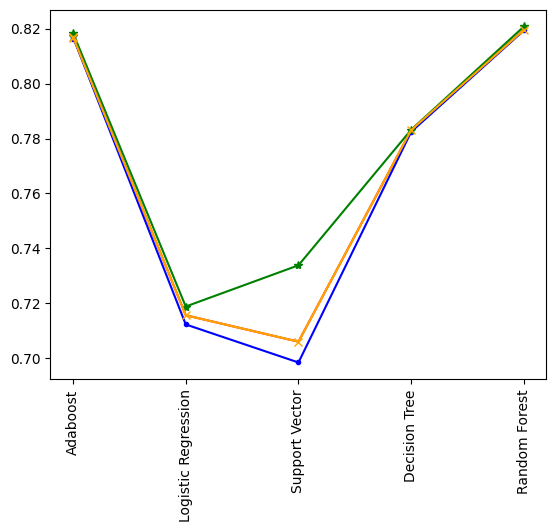

In [183]:
plt.figure()
plt.plot(models, accuracy, color="red", marker=",")
plt.plot(models, f1, color="blue", marker=".")
plt.plot(models, precision, color="green", marker="*")
plt.plot(models, recall, color="orange", marker="x")
plt.xticks(rotation=90)
plt.show()